In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
# type of self-assembly [none, ribbon, nanosphere, organogel, tube, particle, vesicle, hydrogel, fiber]

# Read dataset
df = pd.read_csv("../../data/phase_data_clean.csv")
data = df.drop(labels=["sapdb_id", 'solvent', 'method', 'incubation period (min)', 'size of structure'], axis=1)
data = data.rename(columns={"type of self-assembly[none, ribbon, nanosphere, organogel, tube, particle, vesicle, hydrogel, fiber]":"phase",\
                           "conjugate partner":"conjugate_partner", "volume ratio":"volume_ratio", "concentration(mg/ml)": "concentration"})
print(data.keys())

Index(['sequence', 'N-terminal', 'C-terminal', 'non-terminal',
       'peptide/conjugate/mixture', 'conjugate_partner', 'solution',
       'volume_ratio', 'concentration', 'PH', 'temperature', 'heating/cooling',
       'phase', 'linear/cyclic'],
      dtype='object')


In [3]:
import itertools
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
from matplotlib import font_manager as fm
import os

fname = "path/to/your/font.ttf"
prop = fm.FontProperties(size=13, fname=fname)

### Labels

#### Labels are represented using one-hot encoding [none, ribbon, nanosphere, organogel, tube, particle, vesicle, hydrogel, fiber]

In [4]:
phases = []
for p in data["phase"]:
    tmp = np.zeros(9)
    tmp[p] = 1
    phases.append(tmp.tolist())
phases = np.array(phases)

# Visualize the distribution of phases
plt.figure(figsize=(12, 6))
keys = ["solution", "ribbon", "nanosphere", "organogel", "tube", "particle", "vesicle", "hydrogel", "fiber"]
nums = [data["phase"].tolist().count(i) for i in range(9)]



<Figure size 864x432 with 0 Axes>

In [5]:
### Drop rare phases

indices = [i for i in range(data.shape[0]) if data["phase"][i] == 3]
data = data.drop(index=indices, axis=0)


In [6]:
# Regenerate the output
phases = []
for p in data["phase"]:
    tmp = np.zeros(8)
    if p < 3:        
        tmp[p] = 1
    else:
        tmp[p-1] = 1
    phases.append(tmp.tolist())
phases = np.array(phases)

In [11]:
classes = ["solution", "ribbon", "nanosphere", "tube", "particle", "vesicle", "hydrogel", "fiber"]

/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


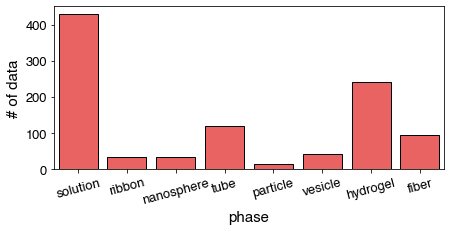

In [12]:
# Visualize the distribution of phases
plt.figure(figsize=(7, 3))
nums_new = [nums[i] for i in range(9) if i != 3]

ax = sns.barplot(classes, nums_new,  color=(1, 0.3, 0.3), edgecolor="0.0")
ax.set_xticklabels(classes, fontproperties=prop, rotation=15)
plt.yticks([0, 100, 200, 300, 400], fontproperties=prop)
plt.xlabel("phase",  fontproperties=prop, fontsize=15)
plt.ylabel("# of data",  fontproperties=prop, fontsize=15)
plt.savefig("phase.png", bbox_inches="tight", dpi=300)


### Categorical feature engineering

#### Features: sequence', 'N-terminal', 'C-terminal', 'non-terminal', 'peptide/conjugate/mixture', 'conjugate_partner', 'heating/cooling', 'linear/cyclic'

dict_values([637, 561, 30, 18, 43, 6, 28, 216, 232, 208, 27, 4, 5, 56, 3, 61, 53, 44, 24, 3, 19, 1, 21, 8])
(1012, 3, 24)
(1012, 7)
(1012, 5)
(1012, 2)
(1012, 3)
(1012, 3)
(1012, 2)
(1012, 2)

/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


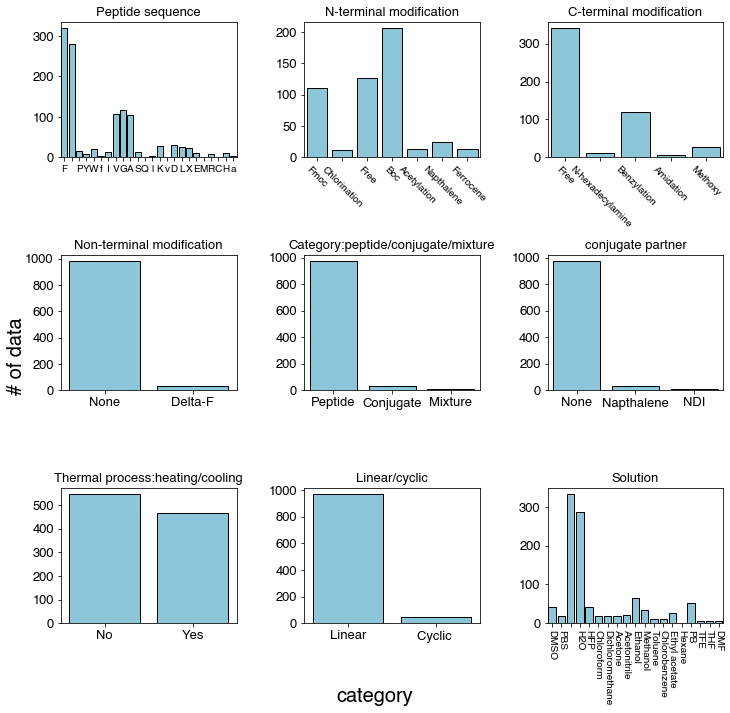

In [9]:
### Sequence
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

seqs = []
seqs = [x.ljust(3, " ") for x in data["sequence"]] # Make all sequences at the same length
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True, lower=False)
tokenizer.fit_on_texts(seqs)

config = tokenizer.get_config()
print(json.loads(config['word_docs']).values())
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[0, 0])
axs[0, 0].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop, fontsize=10)
axs[0, 0].set_yticklabels(np.arange(0, 700, 100), fontproperties=prop)
axs[0, 0].set_title("Peptide sequence", fontproperties=prop)
# Create matrix for each sequence
num_tokens = len(json.loads(config['word_docs']).keys())
seqs_matrices = []
for seq in seqs:
    seqs_matrices.append(tokenizer.texts_to_matrix(seq)[:, 1:].tolist())


seqs_matrices = np.array(seqs_matrices)
print(seqs_matrices.shape)


### N-terminal
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False)
tokenizer.fit_on_texts(data["N-terminal"])
config = tokenizer.get_config()
n_terminal = tokenizer.texts_to_matrix(data["N-terminal"])[:, 1:]
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[0, 1])
axs[0, 1].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop, fontsize=10, rotation=-45)
axs[0, 1].set_yticklabels(np.arange(0, 450, 50), fontproperties=prop)
axs[0, 1].set_title("N-terminal modification", fontproperties=prop)

print(n_terminal.shape)
    
    
### C-terminal
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, filters=[",", "\n"])
tokenizer.fit_on_texts(data["C-terminal"])
config = tokenizer.get_config()
c_terminal = tokenizer.texts_to_matrix(data["C-terminal"])[:, 1:]
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[0, 2])
axs[0, 2].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop, fontsize=10, rotation=-45)
axs[0, 2].set_yticklabels(np.arange(0, 800, 100), fontproperties=prop)
axs[0, 2].set_title("C-terminal modification", fontproperties=prop)
print(c_terminal.shape)


### Non-terminal
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, filters=[",", "\n"])
tokenizer.fit_on_texts(data["non-terminal"])
config = tokenizer.get_config()
non_terminal = tokenizer.texts_to_matrix(data["non-terminal"])[:, 1:]
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[1, 0])
axs[1, 0].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop)
axs[1, 0].set_yticklabels(np.arange(0, 1200, 200), fontproperties=prop)
axs[1, 0].set_title("Non-terminal modification", fontproperties=prop)
print(non_terminal.shape)


### peptide/conjugate/mixture
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, filters=[",", "\n"])
tokenizer.fit_on_texts(data["peptide/conjugate/mixture"])
config = tokenizer.get_config()
pcm = tokenizer.texts_to_matrix(data["peptide/conjugate/mixture"])[:, 1:]
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[1, 1])
axs[1, 1].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop)
axs[1, 1].set_yticklabels(np.arange(0, 1200, 200), fontproperties=prop)
axs[1, 1].set_title("Category:peptide/conjugate/mixture", fontproperties=prop)
print(pcm.shape)

### conjugate partner
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, split="\n", filters=["\n"])
tokenizer.fit_on_texts(data["conjugate_partner"])
config = tokenizer.get_config()
conjugate_partner = tokenizer.texts_to_matrix(data["conjugate_partner"])[:, 1:]
keys = [t for t in list(json.loads(config['word_docs']).keys())[:-1]]
keys.append("NDI")
sns.barplot(keys,list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[1, 2])

axs[1, 2].set_xticklabels(keys, fontproperties=prop)
axs[1, 2].set_yticklabels(np.arange(0, 1200, 200), fontproperties=prop)
axs[1, 2].set_title("conjugate partner", fontproperties=prop)

print(conjugate_partner.shape)


### heating/cooling
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, split="\n", filters=["\n"])
tokenizer.fit_on_texts(data["heating/cooling"].astype(str))
config = tokenizer.get_config()
heat_cool = tokenizer.texts_to_matrix(data["heating/cooling"].astype(str))[:, 1:]
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[2, 0])
axs[2, 0].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop)
axs[2, 0].set_yticklabels(np.arange(0, 600, 100), fontproperties=prop)
axs[2, 0].set_title("Thermal process:heating/cooling", fontproperties=prop)

print(heat_cool.shape)

### Linear/cyclic
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, split="\n", filters=["\n"])
tokenizer.fit_on_texts(data["linear/cyclic"])
config = tokenizer.get_config()
linear_cyclic = tokenizer.texts_to_matrix(data["linear/cyclic"])[:, 1:]
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[2, 1])
axs[2, 1].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop)
axs[2, 1].set_yticklabels(np.arange(0, 1200, 200), fontproperties=prop)
axs[2, 1].set_title("Linear/cyclic", fontproperties=prop)
print(linear_cyclic.shape)



### Deal with solution environment
#### There is a mixture of at most two solvents
### Solvent types
solution = []
for x in data["solution"]:
    if "/" not in x:
        solution.append(x + "/ ")
    else:
        solution.append(x)

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, split="/", filters=["/"])
tokenizer.fit_on_texts(solution)

config = tokenizer.get_config()
sns.barplot(list(json.loads(config['word_docs']).keys()),list(json.loads(config['word_docs']).values()), color=(0.5, 0.8, 0.9), edgecolor="0.0", ax=axs[2, 2])
axs[2, 2].set_xticklabels(json.loads(config['word_docs']).keys(), fontproperties=prop, rotation=-90, fontsize=10)

axs[2, 2].set_yticklabels(np.arange(0, 700, 100), fontproperties=prop)
axs[2, 2].set_title("Solution", fontproperties=prop)

fig.text(0.5, 0.02, 'category', ha='center', fontproperties=prop, fontsize=20)
fig.text(-0.01, 0.5, '# of data', va='center', rotation='vertical', fontproperties=prop, fontsize=20)
fig.tight_layout()
plt.savefig("categorical_features.png", bbox_inches="tight", dpi=600)


### plot dipeptide distribution

dict_keys(['f', 'a', 'l', 'g', 'v', 'p', 'w', 'd', 'k', 'i', 'e', 'y', 'r', 'h', 's', 'm', 'c'])
(19, 19)


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


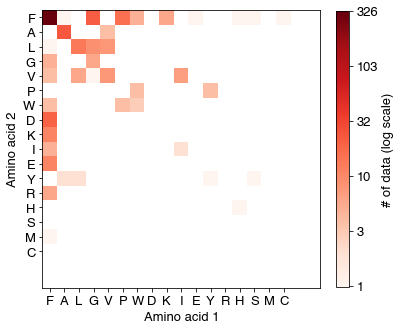

In [10]:
seqs = []
seqs = [x for x in data["sequence"] if len(x) == 2] # Make all sequences at the same length
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True, lower=True)
tokenizer.fit_on_texts(seqs)

num_token = len(json.loads(config['word_index']).keys())
config = tokenizer.get_config()
print(json.loads(config['word_index']).keys())
scatters = np.zeros((num_token, num_token))
for seq in seqs:
    index_i =  tokenizer.texts_to_matrix(seq)[:, 1:].tolist()[0].index(1)
    index_j =  tokenizer.texts_to_matrix(seq)[:, 1:].tolist()[1].index(1)
    scatters[index_i][index_j] += 1

amp = np.max(scatters)
scatters /= amp

scatters = np.log10(scatters)
print(scatters.shape)
fig, ax = plt.subplots(figsize=(5.5,5.5))
cax = ax.imshow(scatters, cmap='Reds')
ax.set_xticks(range(len(json.loads(config['word_index']).keys())))
ax.set_xticklabels([t.upper() for t in json.loads(config['word_index']).keys()], fontproperties=prop)
ax.set_yticks(range(len(json.loads(config['word_index']).keys())))
ax.set_yticklabels([t.upper() for t in json.loads(config['word_index']).keys()], fontproperties=prop)

ticks = np.array([0, -0.5, -1.0, -1.5, -2.0, -2.5])
cbar = fig.colorbar(cax, ticks=ticks, fraction=0.045)
cbar.ax.set_yticklabels((amp * pow(10, ticks)).astype(int), fontproperties=prop)
cbar.ax.set_ylabel("# of data (log scale)", fontproperties=prop)
ax.set_xlabel('Amino acid 1', fontproperties=prop)
ax.set_ylabel('Amino acid 2', fontproperties=prop)
plt.savefig("dipeptide_scattering.png", bbox_inches="tight", dpi=300)

In [11]:
print(seqs)

['FF', 'FF', 'FF', 'FF', 'FP', 'FP', 'FP', 'FP', 'PY', 'PY', 'PY', 'PY', 'WP', 'WP', 'WP', 'WP', 'PW', 'PW', 'PW', 'PW', 'WF', 'WF', 'WF', 'WF', 'FW', 'FW', 'FW', 'FW', 'FF', 'ff', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'IF', 'IF', 'IF', 'IF', 'VF', 'VF', 'VF', 'VF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'II', 'II', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'AA', 'AA', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FG', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'AV', 'AV', 'AV', 'AV', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'FF', 'MF', 'LF', 'IF', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'DF', 'DF', 'DF', 'DF', 'DF', 'DF', 'DF

In [12]:
config["word_docs"]

'{"f": 448, "p": 28, "y": 10, "w": 20, "i": 14, "v": 38, "a": 31, "g": 43, "m": 1, "l": 40, "d": 20, "r": 6, "k": 17, "e": 12, "s": 2, "c": 1, "h": 2}'

In [13]:
config["word_docs"]

'{"f": 448, "p": 28, "y": 10, "w": 20, "i": 14, "v": 38, "a": 31, "g": 43, "m": 1, "l": 40, "d": 20, "r": 6, "k": 17, "e": 12, "s": 2, "c": 1, "h": 2}'

dict_keys(['f', 'a', 'g', 'v', 'x', 'd', 'k', 'w', 's', 'l', 'h', 'i', 'e', 'r', 'y', 'q', 'p', 'm'])


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Use the colorbar set_ticks() method instead.


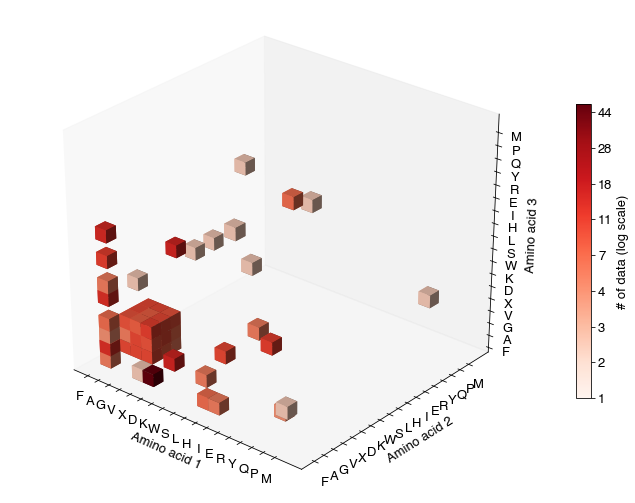

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import viridis
from mpl_toolkits.mplot3d import Axes3D

# Example setup (ensure this matches your data structure)
# grid_values = np.random.rand(100, 100, 100)  # 3D array of interpolated values
seqs = []
seqs = [x for x in data["sequence"] if len(x.replace(" ", "")) == 3] # Make all sequences at the same length
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True, lower=True)
tokenizer.fit_on_texts(seqs)
config = tokenizer.get_config()
# Normalize the grid_values to [0, 1] for colormap mapping
norm = Normalize(vmin=0, vmax=1.6434)
scalar_map = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
scalar_map.set_array([])
num_tokens = len(json.loads(config['word_index']).keys())
print(json.loads(config['word_index']).keys())
grid_values = np.zeros((num_tokens, num_tokens, num_tokens))
for seq in seqs:
    index_i =  tokenizer.texts_to_matrix(seq)[:, 1:].tolist()[0].index(1)
    index_j =  tokenizer.texts_to_matrix(seq)[:, 1:].tolist()[1].index(1)
    index_k =  tokenizer.texts_to_matrix(seq)[:, 1:].tolist()[2].index(1)
    grid_values[index_i][index_j][index_k] += 1
# Create a boolean array for voxels to be plotted (e.g., based on a threshold)

amp = grid_values.max()
grid_values = np.log10(grid_values)
voxel_mask = np.ones(grid_values.shape, dtype=bool) # Example threshold
voxel_mask = grid_values > 0

# For each voxel, determine its color
# Flatten the grid_values for color mapping, then reshape
flat_values = grid_values[voxel_mask]  # Only consider values where mask is True

colors = scalar_map.to_rgba(flat_values)  # Map values to colors

# Prepare the color array for voxels; initialize with zeros (transparent)
face_colors = np.zeros(voxel_mask.shape + (4,), dtype=np.float32)  # Adding a dimension for RGBA colors

# Now, we assign the mapped colors back to their original positions
# This step was missing in the initial explanation
for i, color in enumerate(colors):
    indices = np.where(voxel_mask)  # Get the True indices in voxel_mask
    face_colors[indices[0][i], indices[1][i], indices[2][i], :] = color

# Setup the figure and axes for 3D plotting
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1, projection='3d')
fig.patch.set_facecolor('white')
# Generate the voxel plot without edges by setting edgecolor to 'none'
ax.voxels(voxel_mask, facecolors=face_colors, edgecolor='none')
#ax.voxels(grid_values == 0, facecolors=(1.0, 1.0, 1.0, 0.05), edgecolor='none')
ax.grid(False)
ticks = np.array([-1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0])
cbar =fig.colorbar(scalar_map, ax=ax, shrink=0.6, aspect=20)
cbar.ax.set_yticks(ticks)
cbar.ax.set_yticklabels([round(t) for t in amp * pow(10, ticks)], fontproperties=prop)
cbar.ax.set_ylabel("# of data (log scale)", fontproperties=prop)
ax.set_xlabel('Amino acid 1', fontproperties=prop)
ax.set_ylabel('Amino acid 2', fontproperties=prop)
ax.set_zlabel('Amino acid 3', fontproperties=prop)
ax.set_facecolor("white")
ax.view_init(elev=30, azim=-50)
ax.set_xticks(range(len(json.loads(config['word_index']).keys())))
ax.set_xticklabels([t.upper() for t in json.loads(config['word_index']).keys()], fontproperties=prop)
ax.set_yticks(range(len(json.loads(config['word_index']).keys())))
ax.set_yticklabels([t.upper() for t in json.loads(config['word_index']).keys()], fontproperties=prop)
ax.set_zticks(range(len(json.loads(config['word_index']).keys())))
ax.set_zticklabels([t.upper() for t in json.loads(config['word_index']).keys()], fontproperties=prop)


plt.savefig("tripeptide_scattering.png", bbox_inches="tight", dpi=600)

plt.show()


In [15]:
print(grid_values.shape)

(18, 18, 18)



### Deal with solution environment

#### There is a mixture of at most two solvents

(1012, 2, 19)
(1012, 2)


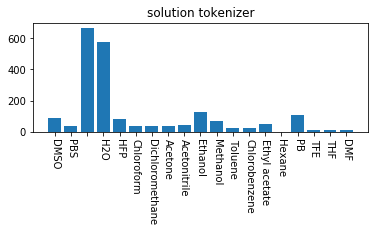

In [16]:
solution = []
for x in data["solution"]:
    if "/" not in x:
        solution.append(x + "/ ")
    else:
        solution.append(x)
 # Make all sequences at the same length
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False, lower=False, split="/", filters=["/"])
tokenizer.fit_on_texts(solution)

config = tokenizer.get_config()
plt.subplots(figsize=(6,2))
plt.bar(json.loads(config['word_docs']).keys(),json.loads(config['word_docs']).values())
plt.title("solution tokenizer")
plt.xticks(rotation=-90)
# Create matrix for each sequence
num_tokens = len(json.loads(config['word_docs']).keys())
solution_matrices = []
for sol in solution:
    solution_matrices.append(tokenizer.texts_to_matrix(sol.split("/"))[:, 1:].tolist())

solution_matrices = np.array(solution_matrices)
print(solution_matrices.shape)


### Volume ratios of solvents
volume_ratio = []
for x in data["volume_ratio"]:
    if "/" not in x:
        volume_ratio.append([100, 0])
    else:
        volume_ratio.append([float(t) for t in x.split("/")])
volume_ratio = np.array(volume_ratio)
print(volume_ratio.shape)

In [17]:
print(json.loads(config['word_docs']).keys())

dict_keys(['DMSO', 'PBS', ' ', 'H2O', 'HFP', 'Chloroform', 'Dichloromethane', 'Acetone', 'Acetonitrile', 'Ethanol', 'Methanol', 'Toluene', 'Chlorobenzene', 'Ethyl acetate', 'Hexane', 'PB', 'TFE', 'THF', 'DMF'])


### Numerical Feature engineering

#### Included features: 'concentration', 'PH', 'temperature'.

In [18]:
from sklearn.preprocessing import MinMaxScaler
concentration = data["concentration"]
PH = data["PH"]
temperature = data["temperature"]
numerical_features = np.transpose(np.vstack((concentration, PH, temperature)))

scaler = MinMaxScaler()
scaler.fit(numerical_features)
numerical_features_scaled = scaler.transform(numerical_features)

print(numerical_features_scaled.shape)

(1012, 3)


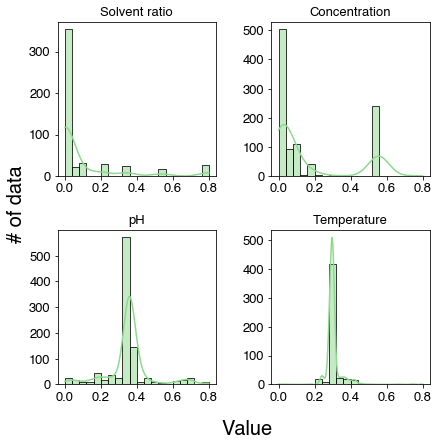

In [19]:
### plot distribution of numerical values
import seaborn as sns
solvent_ratio = []
for t in volume_ratio:
    c_hi = np.max(t)
    c_low = np.min(t)
    solvent_ratio.append(c_low/c_hi)
fig, axs = plt.subplots(2, 2, figsize=(6.67, 6.67))
sns.histplot(solvent_ratio, ax = axs[0, 0], bins=20, kde=True, color=(0.553, 0.851, 0.553), edgecolor="0.0")
axs[0, 0].set_title("Solvent ratio", fontproperties=prop)
axs[0, 0].set_ylabel("")
axs[0, 0].set_xticklabels([-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontproperties=prop)
axs[0, 0].set_yticklabels(np.arange(0, 800, 100), fontproperties=prop)

sns.histplot(numerical_features_scaled[:, 0], ax = axs[0, 1], bins=20, kde=True,color=(0.553, 0.851, 0.553), edgecolor="0.0")
axs[0, 1].set_title("Concentration", fontproperties=prop)
axs[0, 1].set_ylabel("")
axs[0, 1].set_xticklabels([-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontproperties=prop)
axs[0, 1].set_yticklabels(np.arange(0, 800, 100), fontproperties=prop)

sns.histplot(numerical_features_scaled[:, 1], ax = axs[1, 0], bins=20, kde=True, color=(0.553, 0.851, 0.553), edgecolor="0.0")
axs[1, 0].set_title("pH", fontproperties=prop)
axs[1, 0].set_ylabel("")
axs[1, 0].set_xticklabels([-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontproperties=prop)
axs[1, 0].set_yticklabels(np.arange(0, 800, 100), fontproperties=prop)


sns.histplot(numerical_features_scaled[:, 2], ax = axs[1, 1], bins=20, kde=True, color=(0.553, 0.851, 0.553), edgecolor="0.0")
axs[1, 1].set_title("Temperature", fontproperties=prop)
axs[1, 1].set_ylabel("")
axs[1, 1].set_xticklabels([-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontproperties=prop)
axs[1, 1].set_yticklabels(np.arange(0, 900, 100), fontproperties=prop)

fig.text(0.52, 0.02, 'Value', ha='center', fontproperties=prop, fontsize=20)
fig.text(0.02, 0.5, '# of data', va='center', rotation='vertical', fontproperties=prop, fontsize=20)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35)
#fig.tight_layout()
plt.savefig("numerical_features.png",bbox_inches="tight", dpi=600)

In [20]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

### Machine Learning Session

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix,  multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Create input and output
from sklearn.model_selection import train_test_split
num_data = 1012
seqs_flatten = seqs_matrices.reshape((num_data, -1))
solution_flatten = solution_matrices.reshape((num_data, -1))

X = np.hstack((seqs_flatten, c_terminal, n_terminal, non_terminal, pcm, conjugate_partner, heat_cool, linear_cyclic, \
               solution_flatten, volume_ratio, numerical_features_scaled))
print("The shape of inputs is:" + str(X.shape))
y = phases
print("The shape of outputs is:" + str(y.shape))

# Training/Test/Validation = 60/25/15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Number of data in the training set:" + str(X_train.shape[0]))
print("Number of data in the validation set:" + str(X_val.shape[0]))
print("Number of data in the test set:" + str(X_test.shape[0]))

The shape of inputs is:(1012, 139)
The shape of outputs is:(1012, 8)
Number of data in the training set:607
Number of data in the validation set:152
Number of data in the test set:253


In [25]:
# Model architecture
model = models.Sequential()
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(y.shape[1], activation="softmax"))


In [26]:
input_shape = (None, 139)
model.build(input_shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  17920     
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  66048     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  525312    
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  1

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor="loss", patience=5, factor=0.5), 
    EarlyStopping(monitor="val_loss", patience=10), 
    ModelCheckpoint(filepath='./ckpts', save_weights_only=False, save_freq="epoch", verbose=1)
]

history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=64,
                    callbacks=callbacks, validation_data=(X_val, y_val))

Train on 607 samples, validate on 152 samples
Epoch 1/200
 64/607 [==>...........................] - ETA: 6s - loss: 0.5100 - categorical_accuracy: 0.1719
Epoch 00001: saving model to ./ckpts
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 2s 3ms/sample - loss: 0.4817 - categorical_accuracy: 0.2652 - val_loss: 0.3243 - val_categorical_accuracy: 0.4868
Epoch 2/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.3121 - categorical_accuracy: 0.3594
Epoch 00002: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.3325 - categorical_accuracy: 0.3328 - val_loss: 0.3102 - val_categorical_accuracy: 0.5066
Epoch 3/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.3203 - categorical_accuracy: 0.3750
Epoch 00003: saving model to ./ckpts
INFO:tensorflow:Asset

Epoch 23/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.2682 - categorical_accuracy: 0.4062
Epoch 00023: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.2843 - categorical_accuracy: 0.4119 - val_loss: 0.2616 - val_categorical_accuracy: 0.4342
Epoch 24/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.2695 - categorical_accuracy: 0.5156
Epoch 00024: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.2762 - categorical_accuracy: 0.4250 - val_loss: 0.2590 - val_categorical_accuracy: 0.4013
Epoch 25/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.2333 - categorical_accuracy: 0.5938
Epoch 00025: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.2709 - categorical_accuracy:

 64/607 [==>...........................] - ETA: 0s - loss: 0.2006 - categorical_accuracy: 0.6406
Epoch 00069: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.2233 - categorical_accuracy: 0.5667 - val_loss: 0.2310 - val_categorical_accuracy: 0.5000
Epoch 70/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.1989 - categorical_accuracy: 0.6250
Epoch 00070: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.2124 - categorical_accuracy: 0.5601 - val_loss: 0.2188 - val_categorical_accuracy: 0.5987
Epoch 71/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.2447 - categorical_accuracy: 0.4688
Epoch 00071: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.2119 - categorical_accuracy: 0.5684 - val

 64/607 [==>...........................] - ETA: 0s - loss: 0.1427 - categorical_accuracy: 0.7031
Epoch 00115: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.1436 - categorical_accuracy: 0.7183 - val_loss: 0.1903 - val_categorical_accuracy: 0.5395
Epoch 116/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.1581 - categorical_accuracy: 0.7500
Epoch 00116: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.1515 - categorical_accuracy: 0.7150 - val_loss: 0.1935 - val_categorical_accuracy: 0.5395
Epoch 117/200
 64/607 [==>...........................] - ETA: 0s - loss: 0.1329 - categorical_accuracy: 0.7656
Epoch 00117: saving model to ./ckpts
INFO:tensorflow:Assets written to: ./ckpts/assets
607/607 [==============================] - 1s 2ms/sample - loss: 0.1501 - categorical_accuracy: 0.7002 - v

In [28]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


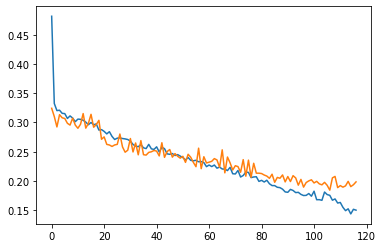

In [29]:
plt.plot(range(117), history.history["loss"], label="train")
plt.plot(range(117), history.history["val_loss"], label="validation")

In [30]:
model = models.load_model('./ckpts')
metrics = model.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[0], metrics[0]))
print("{}: {}".format(model.metrics_names[1], metrics[1]))

pred_class = model.predict_classes(X_test)
y_test_class = [int(y.tolist().index(1)) for y in y_test]

253/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [130]:
import itertools
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
from matplotlib import font_manager as fm
import os

fname = os.path.join("/home/zhenzey/anaconda3/envs/Pytorch-170/lib/python3.6/site-packages/matplotlib/mpl-data", 'fonts', 'ttf', 'helvetica.ttf')
prop = fm.FontProperties(size=13, fname=fname)

def plot_confusion_matrix(cm, classes, filename,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, 
                          ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax=plt.subplots(figsize=(6, 6))
    cm_norm = np.zeros(cm.shape)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cm_norm[i][j] =  cm[i][j] / np.sum(cm[i, :])
    plt.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    #plt.title(title, fontproperties=prop)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontproperties=prop)
    plt.yticks(tick_marks, classes, fontproperties=prop)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm_norm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontproperties=prop)

    cax = fig.add_axes([ax.get_position().x1+0.1,ax.get_position().y0 + 0.1 ,0.02,ax.get_position().height * 0.95 ])
    cbar = plt.colorbar(cax=cax)
    cbar.ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    cbar.ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontproperties=prop)
#     cbar.ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5,  0.6, 0.7, 0.8])
#     cbar.ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5,  0.6, 0.7, 0.8], fontproperties=prop)
    plt.tight_layout()
    ax.set_ylabel('True label', fontproperties=prop)
    ax.set_xlabel('Predicted label', fontproperties=prop)
    plt.savefig(filename, bbox_inches="tight", dpi=300)

### Deal with imbalance

In [131]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE("minority")
X_sm, y_sm = smote.fit_resample(X_train, y_train)
print(X_sm.shape, y_sm.shape)


(842, 139) (842, 8)


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [33]:
# Model architecture
model_sm = models.Sequential()
model_sm.add(layers.Dense(128, activation="relu"))
model_sm.add(layers.Dropout(0.2))
model_sm.add(layers.Dense(512, activation="relu"))
model_sm.add(layers.Dropout(0.2))
model_sm.add(layers.Dense(1024, activation="relu"))
model_sm.add(layers.Dropout(0.2))
model_sm.add(layers.Dense(1024, activation="relu"))
model_sm.add(layers.Dropout(0.2))
model_sm.add(layers.Dense(512, activation="relu"))
model_sm.add(layers.Dropout(0.2))
model_sm.add(layers.Dense(64, activation="relu"))
model_sm.add(layers.Dropout(0.2))
model_sm.add(layers.Dense(y.shape[1], activation="softmax"))

In [34]:
model_sm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor="loss", patience=5, factor=0.5), 
    EarlyStopping(monitor="val_loss", patience=10), 
    ModelCheckpoint(filepath='./ckpts_sm', save_weights_only=False, save_freq="epoch", verbose=1)
]

history = model_sm.fit(X_sm, y_sm,
                    epochs=200,
                    batch_size=64,
                    callbacks=callbacks, validation_data=(X_val, y_val))

Train on 842 samples, validate on 152 samples
Epoch 1/200
704/842 [========================>.....] - ETA: 0s - loss: 0.4478 - categorical_accuracy: 0.3338 
Epoch 00001: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 3s 3ms/sample - loss: 0.4278 - categorical_accuracy: 0.3409 - val_loss: 0.3259 - val_categorical_accuracy: 0.4276
Epoch 2/200
 64/842 [=>............................] - ETA: 0s - loss: 0.2959 - categorical_accuracy: 0.5469
Epoch 00002: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 1s 1ms/sample - loss: 0.3013 - categorical_accuracy: 0.4715 - val_loss: 0.3234 - val_categorical_accuracy: 0.4342
Epoch 3/200
 64/842 [=>............................] - ETA: 0s - loss: 0.3078 - categorical_accuracy: 0.4688
Epoch 00003: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [========================

Epoch 24/200
832/842 [============================>.] - ETA: 0s - loss: 0.2058 - categorical_accuracy: 0.5974
Epoch 00024: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 1s 1ms/sample - loss: 0.2067 - categorical_accuracy: 0.5950 - val_loss: 0.2549 - val_categorical_accuracy: 0.4408
Epoch 25/200
768/842 [==========================>...] - ETA: 0s - loss: 0.2041 - categorical_accuracy: 0.5833
Epoch 00025: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 1s 1ms/sample - loss: 0.2030 - categorical_accuracy: 0.5903 - val_loss: 0.2347 - val_categorical_accuracy: 0.4934
Epoch 26/200
768/842 [==========================>...] - ETA: 0s - loss: 0.2029 - categorical_accuracy: 0.5990
Epoch 00026: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 1s 1ms/sample - loss: 0.2039 - cat

Epoch 47/200
832/842 [============================>.] - ETA: 0s - loss: 0.1573 - categorical_accuracy: 0.6935
Epoch 00047: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 1s 1ms/sample - loss: 0.1572 - categorical_accuracy: 0.6924 - val_loss: 0.2063 - val_categorical_accuracy: 0.5855
Epoch 48/200
768/842 [==========================>...] - ETA: 0s - loss: 0.1609 - categorical_accuracy: 0.6797
Epoch 00048: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 1s 1ms/sample - loss: 0.1581 - categorical_accuracy: 0.6841 - val_loss: 0.2060 - val_categorical_accuracy: 0.6513
Epoch 49/200
832/842 [============================>.] - ETA: 0s - loss: 0.1491 - categorical_accuracy: 0.7079
Epoch 00049: saving model to ./ckpts_sm
INFO:tensorflow:Assets written to: ./ckpts_sm/assets
842/842 [==============================] - 1s 1ms/sample - loss: 0.1491 - cat

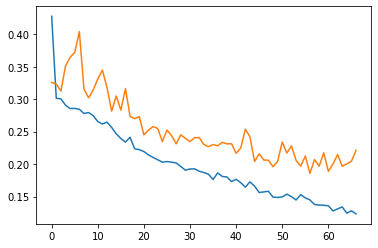

In [35]:
plt.plot(range(67), history.history["loss"], label="train")
plt.plot(range(67), history.history["val_loss"], label="validation")

In [36]:
model_sm = models.load_model('./ckpts_sm')
metrics = model_sm.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[0], metrics[0]))
print("{}: {}".format(model.metrics_names[1], metrics[1]))

pred_class = model_sm.predict_classes(X_test)
y_test_class = [int(y.tolist().index(1)) for y in y_test]

253/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[[61  0  0 15  1  0 33  1]
 [ 3  0  0  1  0  2  7  0]
 [ 1  0  0  3  0  3  0  0]
 [ 0  0  0 31  1  2  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  9  0  0]
 [ 1  0  0  1  0  1 48  0]
 [ 5  0  0  5  0  2  9  4]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


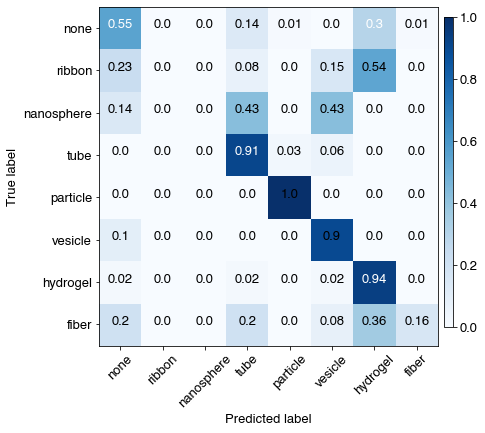

In [37]:
confusion = confusion_matrix(y_test_class, pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "test.png")

### Model selection

In [128]:
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier

### Random forest

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The score of classification is 0.7960526315789473
[[93  1  0  2  1  0 11  3]
 [ 1 12  0  0  0  0  0  0]
 [ 1  0  5  0  0  0  1  0]
 [ 2  2  1 26  0  0  0  3]
 [ 0  0  0  0  2  0  0  0]
 [ 0  1  0  1  0  8  0  0]
 [10  0  0  0  0  0 40  1]
 [ 0  2  1  1  0  0  3 18]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


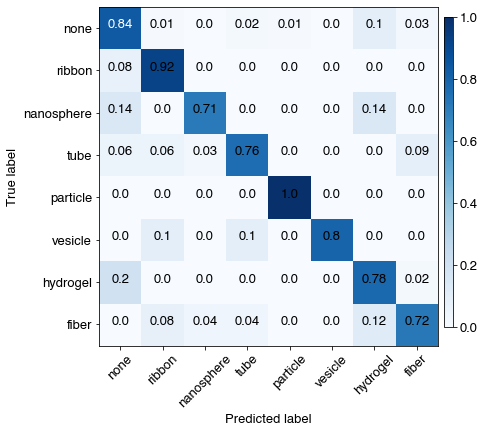

In [39]:
grid_search = {'max_depth': [50, 100, 500, 1000], 
              'n_estimators': [10, 100, 1000, 10000],
              'criterion':["gini", "entropy"]}
RF = RandomForestClassifier(random_state=42)
RF.num_classes = 8
model = GridSearchCV(estimator = RF, param_grid = grid_search, cv=5, verbose=5, n_jobs=8)
y_train_class = [int(y.tolist().index(1)) for y in y_train]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model.fit(X_train, y_train_class)
with open('RF.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('RF.pkl','rb') as f:
    best_RF = pickle.load(f)
    
score = best_RF.score(X_val, y_val_class)
y_pred_class = best_RF.predict(X_test)
print("The score of classification is {}".format(score))
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "RF.png")



[{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10000}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 10000}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 10000}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 10000},

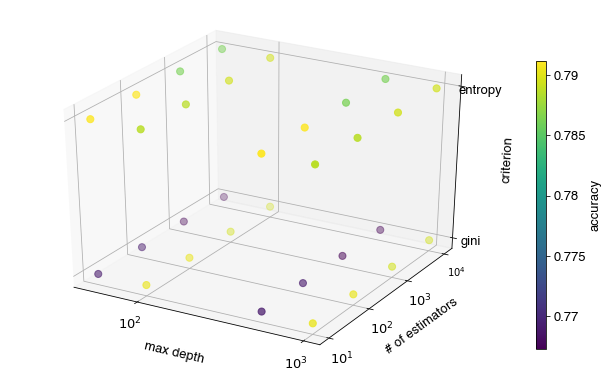

In [40]:
# Plotting grid search results

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = np.array([50, 100, 500, 1000])
y = np.array([10, 100, 1000, 10000])
z = np.array([0, 1])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(np.log10(xs.flatten()), np.log10(ys.flatten()), zs.flatten(), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks([t for t in z])
ax.set_zticklabels(["gini", "entropy"], fontproperties=prop)
ax.set_xticks(np.log10(xs.flatten()))
ax.set_xticklabels(x, fontproperties=prop)
ax.set_yticks(np.log10(ys.flatten()))
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("max depth", fontproperties=prop, labelpad=10)
ax.set_zlabel("criterion", fontproperties=prop, labelpad=10)
ax.set_ylabel("# of estimators", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)
cbar.ax.set_yticklabels([0.77, 0.775, 0.78, 0.785, 0.79, 0.795, 0.8], fontproperties=prop)
plt.savefig("RF_hyperparam.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

### Oversampling with SMOTE

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The score of classification is 0.7828947368421053
[[92  1  0  2  1  0 12  3]
 [ 1 12  0  0  0  0  0  0]
 [ 1  0  5  0  0  0  1  0]
 [ 2  2  1 26  0  0  0  3]
 [ 0  0  0  0  2  0  0  0]
 [ 0  1  0  1  0  8  0  0]
 [ 9  0  0  0  0  0 41  1]
 [ 0  3  1  2  0  0  4 15]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


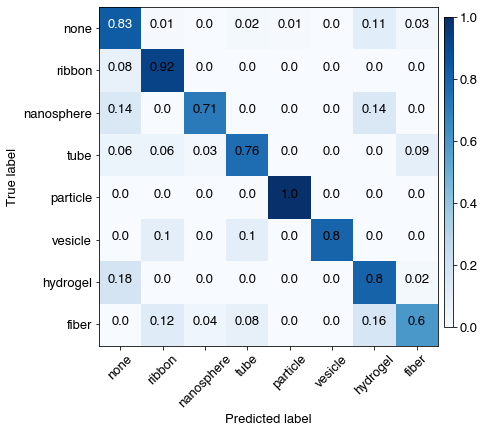

In [41]:
## Imbalanced data
grid_search = {'max_depth': [50, 100, 500, 1000], 
              'n_estimators': [10, 100, 1000, 10000],
              'criterion':["gini", "entropy"]}
RF = RandomForestClassifier(random_state=42)
RF.num_classes = 8

y_train_class = [int(y.tolist().index(1)) for y in y_sm]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model = GridSearchCV(estimator = RF, param_grid = grid_search, cv=5, verbose=5, n_jobs=8)
model.fit(X_sm, y_train_class)
score = model.best_estimator_.score(X_val, y_val_class)

with open('RF_sm.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('RF_sm.pkl','rb') as f:
    best_RF_sm = pickle.load(f)
    
score = best_RF_sm.score(X_val, y_val_class)
y_pred_class = best_RF_sm.predict(X_test)
print("The score of classification is {}".format(score))
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "RF_sm.png")

[{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10000}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 10000}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 500, 'n_estimators': 10000}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 10}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 100}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 1000}, {'criterion': 'gini', 'max_depth': 1000, 'n_estimators': 10000},

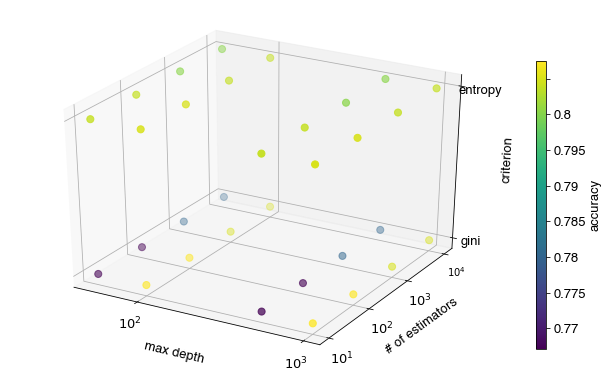

In [42]:
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = np.array([50, 100, 500, 1000])
y = np.array([10, 100, 1000, 10000])
z = np.array([0, 1])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(np.log10(xs.flatten()), np.log10(ys.flatten()), zs.flatten(), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks([t for t in z])
ax.set_zticklabels(["gini", "entropy"], fontproperties=prop)
ax.set_xticks(np.log10(xs.flatten()))
ax.set_xticklabels(x, fontproperties=prop)
ax.set_yticks(np.log10(ys.flatten()))
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("max depth", fontproperties=prop, labelpad=10)
ax.set_zlabel("criterion", fontproperties=prop, labelpad=10)
ax.set_ylabel("# of estimators", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)
cbar.ax.set_yticklabels([0.77, 0.775, 0.78, 0.785, 0.79, 0.795, 0.8], fontproperties=prop)
plt.savefig("RF_hyperparam_sm.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

### MLPClassifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits
The score of classification is 0.48026315789473684
{'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 128, 16), 'max_iter': 100}
[[99  0  0  2  0  0 10  0]
 [11  0  0  2  0  0  0  0]
 [ 2  0  0  2  0  0  3  0]
 [16  0  0  3  0  0 15  0]
 [ 1  0  0  0  0  0  1  0]
 [ 5  0  0  2  0  0  3  0]
 [45  0  0  2  0  0  4  0]
 [16  0  0  7  0  0  2  0]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


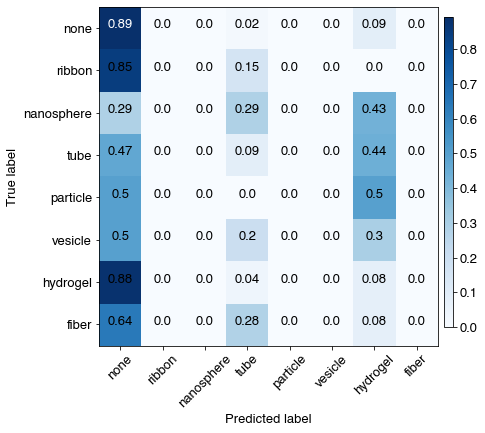

In [52]:
grid_search = {'hidden_layer_sizes': [(64, 64, 16), (128, 128, 16), (128, 128, 32), (128, 128, 128, 16), (128, 256, 128, 16), (128, 256, 512, 256, 128, 16)], 
              'alpha': [0.0001, 0.01, 1], 
              'max_iter':[100, 1000]}

mlp = MLPClassifier(activation='relu', random_state=42, batch_size=64, early_stopping=True)
model = GridSearchCV(estimator = mlp, param_grid = grid_search, cv=5, verbose=5, n_jobs=-1)
y_train_class = [int(y.tolist().index(1)) for y in y_train]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model.fit(X_train, y_train_class)
model.best_estimator_.out_activation_ = 'relu'
with open('mlp.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('mlp.pkl','rb') as f:
    best_mlp = pickle.load(f)

score = best_mlp.score(X_val, y_val_class)
print("The score of classification is {}".format(score))
print(model.best_params_)

y_pred_class= best_mlp.predict(X_test)
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "mlp.png")

[{'alpha': 0.0001, 'hidden_layer_sizes': (64, 64, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (64, 64, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 32), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 32), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 128, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 128, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 512, 256, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 512, 256, 128, 16), 'max_iter': 1000}, {'alpha': 0.01, 'hidden_layer_sizes': (64, 64, 16), 'max_it

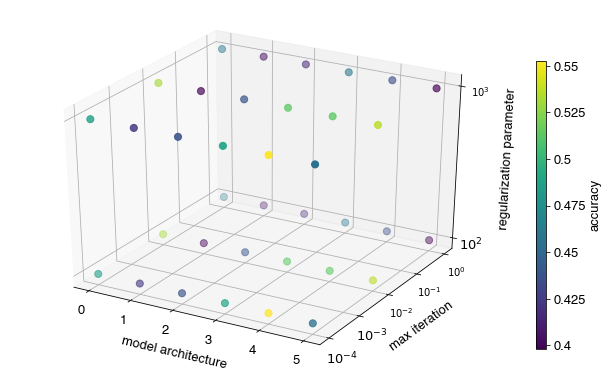

In [53]:
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = range(6)
y = np.array([0.0001, 0.01, 1])
z = np.array([100, 1000])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(xs.flatten(), np.log10(ys.flatten()), np.log10(zs.flatten()), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks(np.log10(zs.flatten()))
ax.set_zticklabels(z, fontproperties=prop)
ax.set_xticks(range(6))
ax.set_xticklabels(x, fontproperties=prop)
ax.set_yticks(np.log10(ys.flatten()))
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("model architecture", fontproperties=prop, labelpad=10)
ax.set_zlabel("regularization parameter", fontproperties=prop, labelpad=10)
ax.set_ylabel("max iteration", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)
cbar.ax.set_yticklabels([0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575], fontproperties=prop)
plt.savefig("mlp_hyperparam.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

### Oversampling with SMOTE

Fitting 5 folds for each of 36 candidates, totalling 180 fits
The score of classification is 0.6118421052631579
{'alpha': 0.01, 'hidden_layer_sizes': (128, 128, 32), 'max_iter': 100}
[[73  0  0  0  1  0 33  4]
 [ 2  3  0  0  0  0  8  0]
 [ 1  0  0  2  2  0  1  1]
 [10  0  0 11  1  0  2 10]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  1  1  7  1  0]
 [ 4  0  0  0  0  0 45  2]
 [ 2  0  0  0  0  0 10 13]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


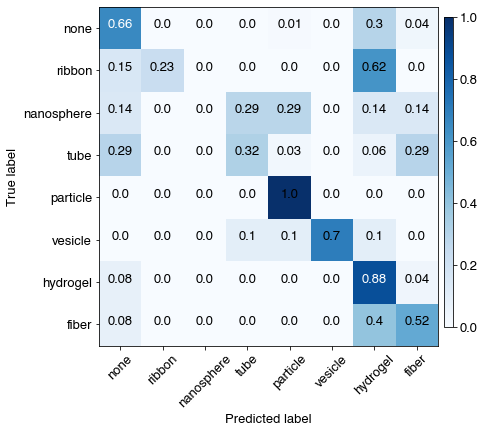

In [55]:

from sklearn.neural_network import MLPClassifier
grid_search = {'hidden_layer_sizes': [(64, 64, 16), (128, 128, 16), (128, 128, 32), (128, 128, 128, 16), (128, 256, 128, 16), (128, 256, 512, 256, 128, 16)], 
              'alpha': [0.0001, 0.01, 1], 
              'max_iter':[100, 1000]}

mlp = MLPClassifier(activation='relu', random_state=42, batch_size=64, early_stopping=True)
model = GridSearchCV(estimator = mlp, param_grid = grid_search, cv=5, verbose=5, n_jobs=-1)
y_train_class = [int(y.tolist().index(1)) for y in y_sm]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model.fit(X_sm, y_train_class)
model.best_estimator_.out_activation_ = 'relu'

with open('mlp_sm.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('mlp_sm.pkl','rb') as f:
    best_mlp_sm = pickle.load(f)
    
score = best_mlp_sm.score(X_val, y_val_class)
print("The score of classification is {}".format(score))
print(model.best_params_)
y_pred_class=best_mlp_sm.predict(X_test)
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "mlp_sm.png")

[{'alpha': 0.0001, 'hidden_layer_sizes': (64, 64, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (64, 64, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 32), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 32), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128, 128, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 128, 16), 'max_iter': 1000}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 512, 256, 128, 16), 'max_iter': 100}, {'alpha': 0.0001, 'hidden_layer_sizes': (128, 256, 512, 256, 128, 16), 'max_iter': 1000}, {'alpha': 0.01, 'hidden_layer_sizes': (64, 64, 16), 'max_it

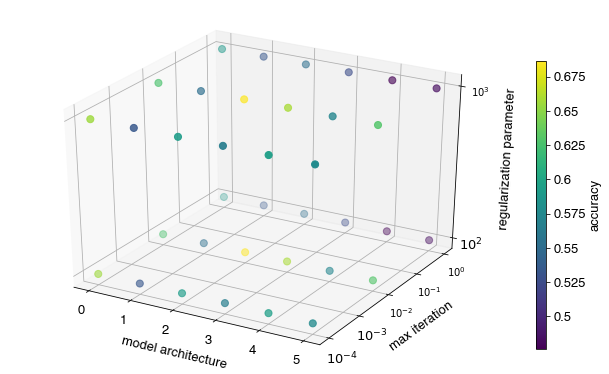

In [56]:
# Plotting grid search results
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = range(6)
y = np.array([0.0001, 0.01, 1])
z = np.array([100, 1000])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(xs.flatten(), np.log10(ys.flatten()), np.log10(zs.flatten()), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks(np.log10(zs.flatten()))
ax.set_zticklabels(z, fontproperties=prop)
ax.set_xticks(range(6))
ax.set_xticklabels(x, fontproperties=prop)
ax.set_yticks(np.log10(ys.flatten()))
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("model architecture", fontproperties=prop, labelpad=10)
ax.set_zlabel("regularization parameter", fontproperties=prop, labelpad=10)
ax.set_ylabel("max iteration", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)
cbar.ax.set_yticklabels([0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7], fontproperties=prop)
plt.savefig("mlp_hyperparam_sm.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

### Gaussian Process Classifier

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/sklearn/gaussian_process/_gpc.py:429: RuntimeWarning: overflow encountered in exp
  - np.log(np.diag(L)).sum()
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


The score of classification is 0.6973684210526315
{'kernel': 1.41**2 * RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 1}
[[74  0  3 13  1  0 16  4]
 [ 6  0  0  0  4  0  3  0]
 [ 1  0  3  2  0  1  0  0]
 [ 5  0  0 22  1  1  0  5]
 [ 0  0  0  0  2  0  0  0]
 [ 1  0  0  1  0  8  0  0]
 [ 6  0  0  1  0  0 41  3]
 [ 4  0  2  2  7  0  3  7]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


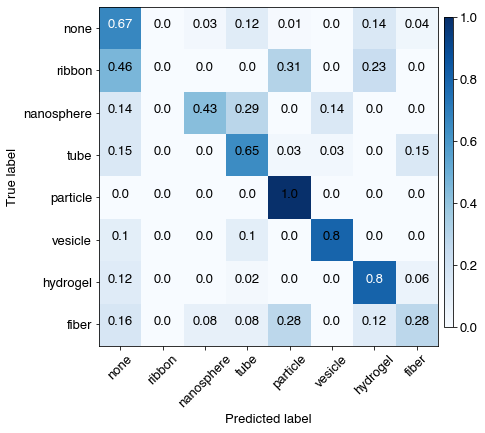

In [57]:
kernel1 = RBF(1.0)
kernel2 = RBF(10.0)
kernel3 = 2.0*RBF(1.0)

grid_search = {'kernel': [kernel1, kernel2, kernel3],
              'n_restarts_optimizer': [0, 1, 5, 10], 
              'max_iter_predict':[100, 200]}

gpc = GaussianProcessClassifier()
model = GridSearchCV(estimator = gpc, param_grid = grid_search, cv=5, verbose=5, n_jobs=-1)
y_train_class = [int(y.tolist().index(1)) for y in y_train]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model.fit(X_train, y_train_class)

with open('gpc.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('gpc.pkl','rb') as f:
    best_gpc = pickle.load(f)
    
score = best_gpc.score(X_val, y_val_class)
print("The score of classification is {}".format(score))
print(model.best_params_)

y_pred_class= best_gpc.predict(X_test)
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "gpc.png")

[{'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 0}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 1}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 5}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 10}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 0}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 1}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 5}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 10}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, 'n_restarts_optimizer': 0}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, 'n_restarts_optimizer': 1}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, 'n_restarts_optimizer': 5}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, '

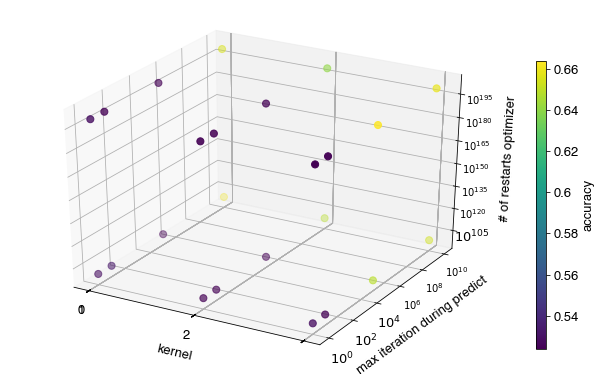

In [58]:
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = np.array([0, 1, 2])
y = np.array([0, 1, 5, 10])
z = np.array([100, 200])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(xs.flatten(), ys.flatten(),zs.flatten(), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks(zs.flatten())
ax.set_zticklabels(z, fontproperties=prop)
ax.set_xticks(xs.flatten())
ax.set_xticklabels(x, fontproperties=prop)
ax.set_yticks(ys.flatten())
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("kernel", fontproperties=prop, labelpad=10)
ax.set_zlabel("# of restarts optimizer", fontproperties=prop, labelpad=10)
ax.set_ylabel("max iteration during predict", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)
cbar.ax.set_yticklabels([0.54, 0.56,  0.58, 0.60, 0.62, 0.64, 0.66], fontproperties=prop)
plt.savefig("gpc_hyperparam.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/sklearn/gaussian_process/_gpc.py:429: RuntimeWarning: overflow encountered in exp
  - np.log(np.diag(L)).sum()
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:418: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


The score of classification is 0.7302631578947368
{'kernel': 1.41**2 * RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 10}
[[78  0  1 12  1  0 16  3]
 [ 1 11  0  0  0  0  1  0]
 [ 0  0  3  2  0  1  0  1]
 [ 4  1  0 23  1  1  0  4]
 [ 0  0  0  0  2  0  0  0]
 [ 1  0  0  1  0  8  0  0]
 [ 6  1  0  0  1  0 40  3]
 [ 2  2  1  2  0  0  3 15]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


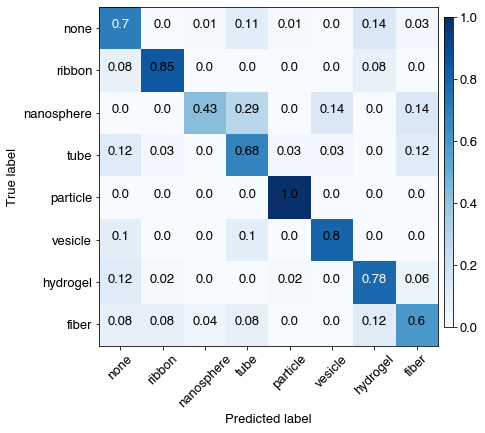

In [59]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


kernel1 = RBF(1.0)
kernel2 = RBF(10.0)
kernel3 = 2.0*RBF(1.0)

grid_search = {'kernel': [kernel1, kernel2, kernel3],
              'n_restarts_optimizer': [0, 1, 5, 10], 
              'max_iter_predict':[100, 200]}

gpc = GaussianProcessClassifier()
model = GridSearchCV(estimator = gpc, param_grid = grid_search, cv=5, verbose=5, n_jobs=-1)
y_train_class = [int(y.tolist().index(1)) for y in y_sm]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model.fit(X_sm, y_train_class)
with open('gpc_sm.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('gpc_sm.pkl','rb') as f:
    best_gpc_sm = pickle.load(f)
    
score = best_gpc_sm.score(X_val, y_val_class)
print("The score of classification is {}".format(score))
print(model.best_params_)

y_pred_class= best_gpc_sm.predict(X_test)
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "gpc_sm.png")

[{'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 0}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 1}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 5}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 100, 'n_restarts_optimizer': 10}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 0}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 1}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 5}, {'kernel': RBF(length_scale=1), 'max_iter_predict': 200, 'n_restarts_optimizer': 10}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, 'n_restarts_optimizer': 0}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, 'n_restarts_optimizer': 1}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, 'n_restarts_optimizer': 5}, {'kernel': RBF(length_scale=10), 'max_iter_predict': 100, '

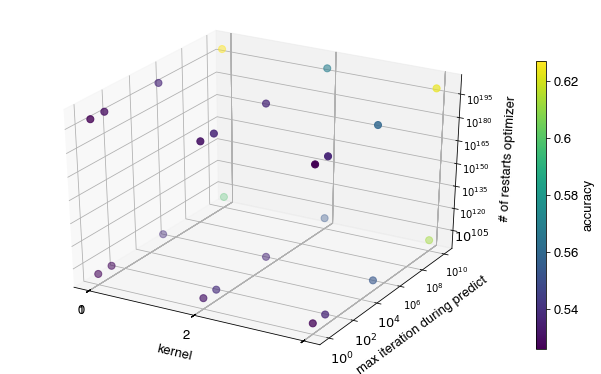

In [60]:
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = np.array([0, 1, 2])
y = np.array([0, 1, 5, 10])
z = np.array([100, 200])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(xs.flatten(), ys.flatten(),zs.flatten(), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks(zs.flatten())
ax.set_zticklabels(z, fontproperties=prop)
ax.set_xticks(xs.flatten())
ax.set_xticklabels(x, fontproperties=prop)
ax.set_yticks(ys.flatten())
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("kernel", fontproperties=prop, labelpad=10)
ax.set_zlabel("# of restarts optimizer", fontproperties=prop, labelpad=10)
ax.set_ylabel("max iteration during predict", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)
cbar.ax.set_yticklabels([0.54, 0.56,  0.58, 0.60, 0.62, 0.64, 0.66], fontproperties=prop)
plt.savefig("gpc_hyperparam_sm.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

### KNeighborsClassifier

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The score of classification is 0.7960526315789473
{'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}
[[88  1  0  2  1  0 16  3]
 [ 1 12  0  0  0  0  0  0]
 [ 2  0  3  0  0  1  1  0]
 [ 3  2  0 25  0  0  0  4]
 [ 0  0  0  0  2  0  0  0]
 [ 0  1  0  1  0  7  0  1]
 [ 8  0  0  1  0  0 38  4]
 [ 3  2  2  2  0  0  5 11]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


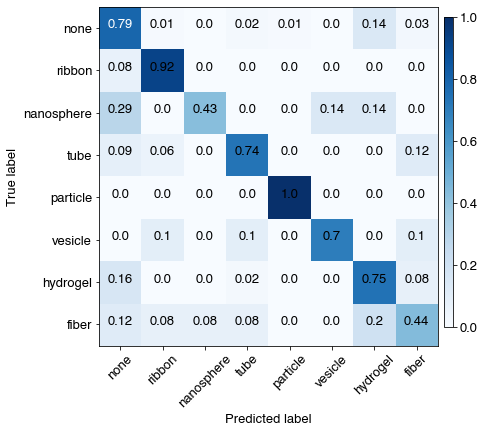

In [132]:
grid_search = {'n_neighbors': [1, 3, 5, 10, 100],
              'leaf_size': [1, 5, 10, 100], 
              'weights':['uniform', 'distance']}

knc= KNeighborsClassifier()
model = GridSearchCV(estimator = knc, param_grid = grid_search, cv=5, verbose=5, n_jobs=-1)
y_train_class = [int(y.tolist().index(1)) for y in y_train]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model.fit(X_train, y_train_class)

with open('knc.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('knc.pkl','rb') as f:
    best_knc = pickle.load(f)
score = best_knc.score(X_val, y_val_class)
print("The score of classification is {}".format(score))
print(model.best_params_)

y_pred_class= best_knc.predict(X_test)
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "knc.png")

In [ ]:
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = np.array([1, 3, 5, 10, 100])
y = np.array([1, 5, 10, 100])
z = np.array([0, 1])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(np.log10(xs.flatten()), np.log10(ys.flatten()),zs.flatten(), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks(zs.flatten())
ax.set_zticklabels(["uniform", "distance"], fontproperties=prop, rotation=30)
ax.set_xticks(np.log10(xs.flatten()))
ax.set_xticklabels([1, 3, 5, 10, 100], fontproperties=prop)
ax.set_yticks(np.log10(ys.flatten()))
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("# of neighbors", fontproperties=prop, labelpad=10)
ax.set_zlabel("leaf size", fontproperties=prop, labelpad=10)
ax.set_ylabel("weights", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)
cbar.ax.set_yticklabels([0.45, 0.5, 0.55, 0.6, 0.65, 0.7], fontproperties=prop)
plt.savefig("knc_hyperparam.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The score of classification is 0.756578947368421
{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
[[87  0  0  3  1  0 18  2]
 [ 1 12  0  0  0  0  0  0]
 [ 1  0  4  0  0  1  1  0]
 [ 2  2  0 22  1  1  0  6]
 [ 0  0  0  0  2  0  0  0]
 [ 0  0  0  2  0  6  0  2]
 [ 6  0  0  1  0  0 40  4]
 [ 3  2  0  2  0  0  3 15]]


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Use the colorbar set_ticks() method instead.
/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


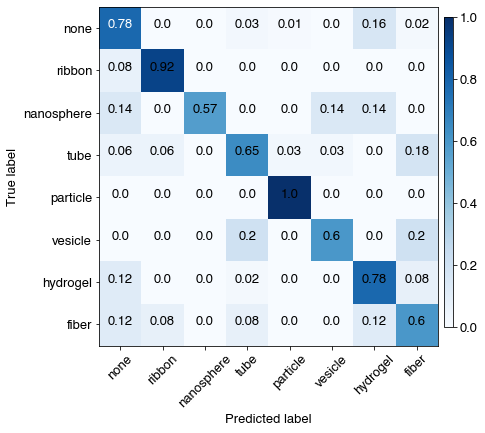

In [20]:
from sklearn.neighbors import KNeighborsClassifier


grid_search = {'n_neighbors': [1, 3, 5, 10, 100],
              'leaf_size': [1, 5, 10, 100], 
              'weights':['uniform', 'distance']}

knc= KNeighborsClassifier()
model = GridSearchCV(estimator = knc, param_grid = grid_search, cv=5, verbose=5, n_jobs=-1)
y_train_class = [int(y.tolist().index(1)) for y in y_sm]
y_val_class = [int(y.tolist().index(1)) for y in y_val]
model.fit(X_sm, y_train_class)

with open('knc_sm.pkl','wb') as f:
    pickle.dump(model.best_estimator_,f)
with open('knc_sm.pkl','rb') as f:
    best_knc_sm = pickle.load(f)
    
score = best_knc_sm.score(X_val, y_val_class)
print("The score of classification is {}".format(score))
print(model.best_params_)
y_test_class = [int(y.tolist().index(1)) for y in y_test]
y_pred_class= best_knc_sm.predict(X_test)
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)
plot_confusion_matrix(confusion, classes, "knc_sm.png")

[{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}, {'leaf_size': 1, 'n_neighbors': 1, 'weights': 'distance'}, {'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}, {'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}, {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}, {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}, {'leaf_size': 1, 'n_neighbors': 10, 'weights': 'uniform'}, {'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}, {'leaf_size': 1, 'n_neighbors': 100, 'weights': 'uniform'}, {'leaf_size': 1, 'n_neighbors': 100, 'weights': 'distance'}, {'leaf_size': 5, 'n_neighbors': 1, 'weights': 'uniform'}, {'leaf_size': 5, 'n_neighbors': 1, 'weights': 'distance'}, {'leaf_size': 5, 'n_neighbors': 3, 'weights': 'uniform'}, {'leaf_size': 5, 'n_neighbors': 3, 'weights': 'distance'}, {'leaf_size': 5, 'n_neighbors': 5, 'weights': 'uniform'}, {'leaf_size': 5, 'n_neighbors': 5, 'weights': 'distance'}, {'leaf_size': 5, 'n_neighbors': 10, 'weights': 'uniform'}

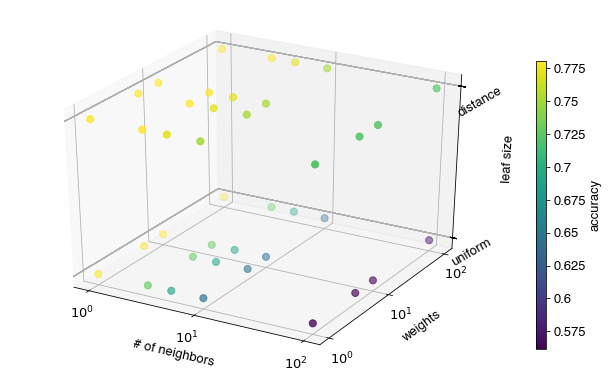

In [27]:
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)

x = np.array([1, 3, 5, 10, 100])
y = np.array([1, 5, 10, 100])
z = np.array([0, 1])

xs, ys, zs = np.meshgrid(x, y, z)


sc = ax.scatter(np.log10(xs.flatten()), np.log10(ys.flatten()),zs.flatten(), c=model.cv_results_['mean_test_score'], s=50)
ax.set_zticks(zs.flatten())
ax.set_zticklabels(["uniform", "distance"], fontproperties=prop, rotation=30)
ax.set_xticks(np.log10(xs.flatten()))
ax.set_xticklabels([1, 3, 5, 10, 100], fontproperties=prop)
ax.set_yticks(np.log10(ys.flatten()))
ax.set_yticklabels(y, fontproperties=prop)
ax.set_xlabel("# of neighbors", fontproperties=prop, labelpad=10)
ax.set_zlabel("leaf size", fontproperties=prop, labelpad=10)
ax.set_ylabel("weights", fontproperties=prop, labelpad=10)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0 + 0.05 ,0.02,ax.get_position().height * 0.8])
cbar = plt.colorbar(sc, cax=cax)

cbar.ax.set_yticklabels([0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775], fontproperties=prop)
plt.savefig("knc_hyperparam_sm.png", bbox_inches="tight", dpi=600)
cbar.set_label("accuracy", fontproperties=prop)
print(model.cv_results_['params'])
print(len(model.cv_results_['mean_test_score']))

### Collect results and compare models

In [23]:
import pickle
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [65]:
with open("RF.pkl", "rb") as f:
    rf = pickle.load(f)
    
with open("mlp.pkl", "rb") as f:
    mlp = pickle.load(f)
    
with open("gpc.pkl", "rb") as f:
    gpc = pickle.load(f)
    
with open("knc.pkl", "rb") as f:
    knc = pickle.load(f)    
    
y_test_class = [int(y.tolist().index(1)) for y in y_test]
models = [rf, mlp, gpc, knc]
labels = ["RF", "MLP", "GPC", "KNC"]
accuracies = []
f1s = []
precisions = []
recalls = []
for label, model in zip(labels, models):
    score = model.score(X_test, y_test_class)
    y_pred_class= model.predict(X_test)
    f1 = f1_score(y_test_class, y_pred_class, average='weighted')
    precision = precision_score(y_test_class, y_pred_class, average='weighted')
    recall = recall_score(y_test_class, y_pred_class, average='weighted')
    print("The accuracy of model %s is %.3f" % (label, score))
    print("The precision score of model %s is %.3f" % (label, precision))
    print("The recall score of model %s is %.3f" % (label, recall))
    print("The f1 score of model %s is %.3f" % (label, f1))
    accuracies.append(score)
    f1s.append(f1)
    precisions.append(precision)
    recalls.append(recall)

The accuracy of model RF is 0.806
The precision score of model RF is 0.814
The recall score of model RF is 0.806
The f1 score of model RF is 0.808
The accuracy of model MLP is 0.419
The precision score of model MLP is 0.264
The recall score of model MLP is 0.419
The f1 score of model MLP is 0.317


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of model GPC is 0.621
The precision score of model GPC is 0.617
The recall score of model GPC is 0.621
The f1 score of model GPC is 0.612
The accuracy of model KNC is 0.767
The precision score of model KNC is 0.815
The recall score of model KNC is 0.767
The f1 score of model KNC is 0.751


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


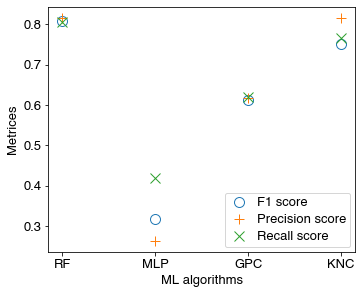

In [72]:

plt.figure(figsize=(5.5, 4.5))
plt.plot(labels, f1s, label="F1 score", marker="o", markersize=10, mfc="None", linestyle="None")
plt.plot(labels, precisions, label="Precision score", marker="+", markersize=10, linestyle="None")
plt.plot(labels, recalls, label="Recall score", marker="x",markersize=10, linestyle="None")
plt.xticks(fontproperties=prop)
plt.yticks(fontproperties=prop)
leg = plt.legend()
texts = leg.get_texts()
for text in texts:
    text.set_fontproperties(prop)
plt.xlabel("ML algorithms", fontproperties=prop)
plt.ylabel("Metrices", fontproperties=prop)
plt.savefig("model_comparison.png", bbox_inches="tight", dpi=600)

In [24]:
# Oversampling
import pickle
with open("RF_sm.pkl", "rb") as f:
    rf = pickle.load(f)
    
with open("mlp_sm.pkl", "rb") as f:
    mlp = pickle.load(f)
    
with open("gpc_sm.pkl", "rb") as f:
    gpc = pickle.load(f)
    
with open("knc_sm.pkl", "rb") as f:
    knc = pickle.load(f)    
    
y_test_class = [int(y.tolist().index(1)) for y in y_test]
models = [rf, mlp, gpc, knc]
labels = ["RF", "MLP", "GPC", "KNC"]
accuracies_sm = []
f1s_sm = []
precisions_sm = []
recalls_sm = []
for label, model in zip(labels, models):
    score = model.score(X_test, y_test_class)
    y_pred_class= model.predict(X_test)
    f1 = f1_score(y_test_class, y_pred_class, average='weighted')
    precision = precision_score(y_test_class, y_pred_class, average='weighted')
    recall = recall_score(y_test_class, y_pred_class, average='weighted')
    print("The accuracy of model %s is %.3f" % (label, score))
    print("The precision score of model %s is %.3f" % (label, precision))
    print("The recall score of model %s is %.3f" % (label, recall))
    print("The f1 score of model %s is %.3f" % (label, f1))
    accuracies_sm.append(score)
    f1s_sm.append(f1)
    precisions_sm.append(precision)
    recalls_sm.append(recall)

The accuracy of model RF is 0.794
The precision score of model RF is 0.804
The recall score of model RF is 0.794
The f1 score of model RF is 0.796
The accuracy of model MLP is 0.609
The precision score of model MLP is 0.680
The recall score of model MLP is 0.609
The f1 score of model MLP is 0.599


/home/zhenzey/envs/virtualenvs/compfield/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of model GPC is 0.711
The precision score of model GPC is 0.730
The recall score of model GPC is 0.711
The f1 score of model GPC is 0.714
The accuracy of model KNC is 0.743
The precision score of model KNC is 0.761
The recall score of model KNC is 0.743
The f1 score of model KNC is 0.746


In [26]:
# Generalization
# Data from ML_generalization.ipynb
f1s_generalization = [0.516, 0.227, 0.448, 0.286]
precisions_generalization = [0.588, 0.168, 0.494, 0.304]
recalls_generalization = [0.543, 0.367, 0.473, 0.398]


In [27]:
labels = ["RF", "MLP", "GPC", "KNC"]
f1s = [0.808, 0.317, 0.612, 0.751]
f1s_sm = [0.796, 0.599, 0.714, 0.746]

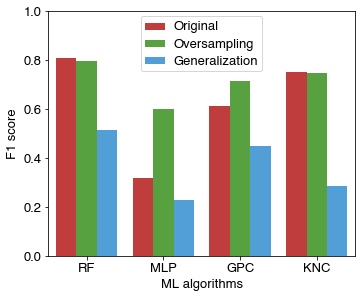

In [32]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
groups = labels
metric1 = f1s
metric2 = f1s_sm
metric3 = f1s_generalization

# Create a DataFrame
df = pd.DataFrame({
    'Group': groups * 3,  # Repeat groups for each metric
    'Case': ['Original']*len(groups) + ['Oversampling']*len(groups) + ['Generalization']*len(groups),
    'F1 score': metric1 + metric2 + metric3
})


# Plot using seaborn
plt.figure(figsize=(5.5, 4.5))
sns.barplot(data=df, x='Group', y='F1 score', hue='Case',palette=['#d62728', '#50b131', '#3ba3ec'])

plt.xlabel("ML algorithms", fontproperties=prop)
plt.ylabel("F1 score", fontproperties=prop)
#plt.title('Metrics Comparison Across Groups', fontsize=16)
plt.ylim([0, 1])
leg = plt.legend(loc="upper center")
texts = leg.get_texts()
for text in texts:
    text.set_fontproperties(prop)
plt.xticks(fontproperties=prop)
plt.yticks(fontproperties=prop)

plt.savefig("oversampling_generalization.png", bbox_inches="tight", dpi=600)
plt.show()

In [60]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [58]:
print(sns.color_palette("flare").as_hex())

['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']
